In [1]:

!pip install mltu==1.0.15
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.5 MB/s eta 0:00:00


In [2]:
from mltu.inferenceModel import OnnxInferenceModel
from mltu.utils.text_utils import ctc_decoder, get_cer

import cv2
import typing
import numpy as np

import pandas as pd
from tqdm import tqdm
from mltu.configs import BaseModelConfigs

In [5]:
!unzip models_captcha3.zip

Archive:  models_captcha3.zip
   creating: Models/
   creating: Models/02_captcha_to_text/
   creating: Models/02_captcha_to_text/202308201249/
   creating: Models/02_captcha_to_text/202308201249/logs/
   creating: Models/02_captcha_to_text/202308201249/logs/train/
  inflating: Models/02_captcha_to_text/202308201249/logs/train/events.out.tfevents.1692535793.e3537dd59670.28.0.v2  
   creating: Models/02_captcha_to_text/202308201249/logs/validation/
  inflating: Models/02_captcha_to_text/202308201249/logs/validation/events.out.tfevents.1692535832.e3537dd59670.28.1.v2  
  inflating: Models/02_captcha_to_text/202308201249/model.onnx  
  inflating: Models/02_captcha_to_text/202308201249/logs.log  
  inflating: Models/02_captcha_to_text/202308201249/val.csv  
  inflating: Models/02_captcha_to_text/202308201249/train.csv  
  inflating: Models/02_captcha_to_text/202308201249/configs.yaml  
  inflating: Models/02_captcha_to_text/202308201249/model.h5  


In [6]:


class ImageToWordModel(OnnxInferenceModel):
    def __init__(self, char_list: typing.Union[str, list], *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.char_list = char_list

    def predict(self, image: np.ndarray):
        image = cv2.resize(image, self.input_shape[:2][::-1])

        image_pred = np.expand_dims(image, axis=0).astype(np.float32)

        preds = self.model.run(None, {self.input_name: image_pred})[0]

        text = ctc_decoder(preds, self.char_list)[0]

        return text



In [7]:
configs = BaseModelConfigs.load("/content/Models/02_captcha_to_text/202308201249/configs.yaml")

model = ImageToWordModel(model_path=configs.model_path, char_list=configs.vocab)

# df = pd.read_csv("Models/02_captcha_to_text/202308180316/val.csv").values.tolist()

# accum_cer = []
# benar = 0
# salah = 0
# for image_path, label in tqdm(df):
#     image = cv2.imread(image_path)

#     prediction_text = model.predict(image)

#     cer = get_cer(prediction_text, label)
#     print(f"Image: {image_path}, Label: {label}, Prediction: {prediction_text}, CER: {cer}")

#     accum_cer.append(cer)

#     if prediction_text == label:
#       benar += 1
#     elif prediction_text != label:
#       salah += 1

# print(f"Average CER: {np.average(accum_cer)}")
# print(f"jumlah yang benar : {benar}\njumlah yang salah : {salah}")
# print(f"Jumlah data test : {len(df)}")

In [8]:
# preprocess
import cv2

def clearfy(img):
  img = cv2.imread(img)
  img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

  th3 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
  cv2.THRESH_BINARY,11,2)
  width = int(200)
  height = int(60)
  dim = (width, height)

  resized = cv2.resize(th3, dim, interpolation = cv2.INTER_AREA)

  kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(1,1))

  dilate = cv2.dilate(resized,kernel)
  # opening = cv2.morphologyEx(dilate, cv2.MORPH_OPEN,kernel)
  closing = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel)
  ret,thresh1 = cv2.threshold(closing,50,255,cv2.THRESH_BINARY)
  opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN,kernel)


  return  cv2.cvtColor(opening,cv2.COLOR_GRAY2RGB)

In [9]:
image = clearfy("contoh_captcha.jpg")

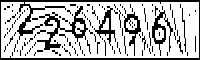

In [11]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [12]:
predict = model.predict(image)
predict

'2649b'

In [22]:
def predict(img):
  image = clearfy(img)
  cv2_imshow(image)
  predict = model.predict(image)
  print(predict)
  print("="*20)

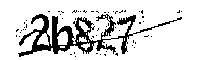

2b827


In [18]:
predict("2b827.png")

In [13]:
import os

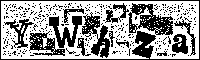

iw5djj


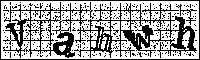

axwh


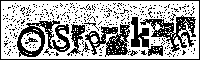

osraka


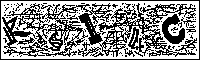

svttc


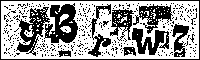

g8r4w


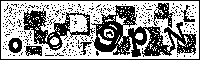

4d38pm


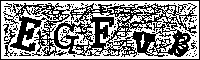

ptzwo


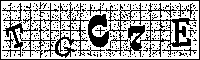

c62zf


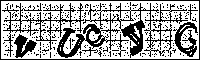

noxg


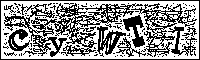

dw42


In [27]:
for images in os.listdir("/content"):
    # check if the image ends with png
    if ((images.endswith(".png")) | (images.endswith(".jpg"))):
      # os.remove(images)
        predict(images)
